In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# settings for Seaborn graphs
sns.set_style(style="darkgrid")
import os

# For cleaning texts
import string

# Importing wordcloud and its necessary stopwords package
from wordcloud import WordCloud, STOPWORDS 

In [3]:
%%time
# Importing the csv 
tips = pd.read_csv('tips.csv')

# Displaying the first 5 lines of the csv 
tips.head(10)

CPU times: user 5.58 s, sys: 3.39 s, total: 8.97 s
Wall time: 15.2 s


,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0
5,HHNBqfbDR8b1iq-QGxu8ww,ALwAlxItASeEs2vYAeLXHA,Great ramen! Not only is the presentation gorg...,2015-05-20 20:17:38,0
6,r0j4IpUbcdC1-HfoMYae4w,d_L-rfS1vT3JMzgCUGtiow,Cochinita Pibil was memorable & delicious !,2014-09-01 01:23:48,0
7,gxVQZJVeKBUk7jEhSyqv-A,5FIOXmUE3qMviX9GafGH-Q,Get a tsoynami for sure.,2010-01-30 02:03:16,0
8,2hdR7KYAmnCk2FjTnPFsuw,rcaPajgKOJC2vo_l3xa42A,Kelly is an awesome waitress there!,2012-05-29 02:05:56,0
9,DsWg3leomfasGs3j0rOfbQ,hfBrethLHS9iXeBNR8MtzQ,Check out the great assortment of organic & co...,2011-09-30 18:38:47,0


In [63]:
# Getting the basic informaion on tips
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320761 entries, 0 to 1320760
Data columns (total 10 columns):
user_id             1320761 non-null object
business_id         1320761 non-null object
text                1320753 non-null object
date                1320761 non-null datetime64[ns]
compliment_count    1320761 non-null int64
Tips - Year         1320761 non-null int64
Tips - Month        1320761 non-null object
Tips - Day          1320761 non-null int64
Tips - Hour         1320761 non-null int64
Tips - DayofWeek    1320761 non-null object
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 100.8+ MB


In [64]:
# Seeing if there's anything that might be valuable 
tips.describe()

,compliment_count,Tips - Year,Tips - Day,Tips - Hour
count,1.320761e+06,1.320761e+06,1.320761e+06,1.320761e+06
mean,1.582270e-02,2.014415e+03,1.574893e+01,1.202706e+01
std,1.421746e-01,2.530795e+00,8.809825e+00,8.425178e+00
min,0.000000e+00,2.009000e+03,1.000000e+00,0.000000e+00
25%,0.000000e+00,2.012000e+03,8.000000e+00,3.000000e+00
50%,0.000000e+00,2.014000e+03,1.600000e+01,1.500000e+01
75%,0.000000e+00,2.017000e+03,2.300000e+01,2.000000e+01
max,1.500000e+01,2.019000e+03,3.100000e+01,2.300000e+01


In [ ]:
# It does seem like we'll have to change the data types of some of the columns. 

In [70]:
tips['text'][1]

'Cucumber strawberry refresher'

**Splitting up the date time column to see how tips are given through the year down to the day**

In [7]:
# Converting date column data type from object to datetime just incase 
tips['date'] = pd.to_datetime(tips['date'])

# Converting true_df date columns into year, month and day
# Extracting the year of publishing
tips['Tips - Year'] = tips['date'].dt.year

# Extracting the month of the year
tips['Tips - Month'] = tips['date'].dt.month_name()

# Extracting the day of the month
tips['Tips - Day'] = tips['date'].dt.day

# Extracting hour of day
tips['Tips - Hour'] = tips['date'].dt.hour

# Extracting day of week
tips['Tips - DayofWeek'] = tips['date'].dt.day_name()

# Let's take a look at the dataframe now as it shouldve added 5 columns
tips.head()

,user_id,business_id,text,date,compliment_count,Tips - Year,Tips - Month,Tips - Day,Tips - Hour,Tips - DayofWeek
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0,2013,November,26,18,Tuesday
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0,2014,June,15,22,Sunday
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0,2016,July,18,22,Monday
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0,2014,June,6,1,Friday
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0,2011,April,8,18,Friday


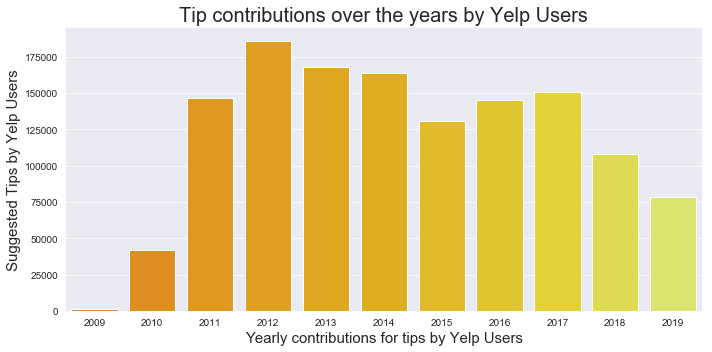

In [51]:
# Let's see how the tipping has changed over the years
plt.figure(figsize = (10,5))
sns.countplot(tips['Tips - Year'], palette = 'Wistia_r' )
plt.xlabel('Yearly contributions for tips by Yelp Users', fontsize = 15)
plt.ylabel('Suggested Tips by Yelp Users', fontsize = 15)
plt.title('Tip contributions over the years by Yelp Users', fontsize = 20)
plt.tight_layout()
plt.show()

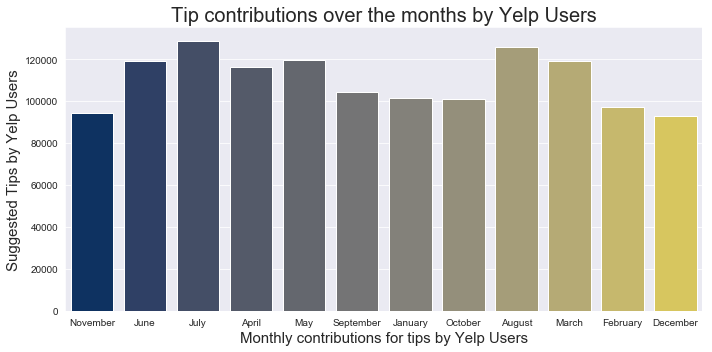

In [61]:
# Let's see how the tipping has changed over the months
plt.figure(figsize = (10,5))
sns.countplot(tips['Tips - Month'], palette = 'cividis')
plt.xlabel('Monthly contributions for tips by Yelp Users', fontsize = 15)
plt.ylabel('Suggested Tips by Yelp Users', fontsize = 15)
plt.title('Tip contributions over the months by Yelp Users', fontsize = 20)
plt.tight_layout()
plt.show()

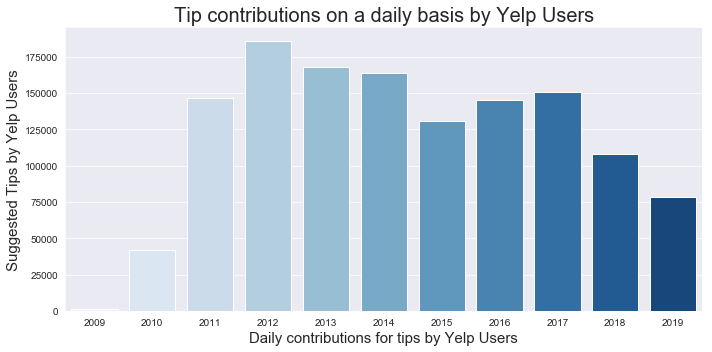

In [53]:
# Let's see how the tipping has changed over the days
plt.figure(figsize = (10,5))
sns.countplot(tips['Tips - Year'], palette = 'Blues' )
plt.xlabel('Daily contributions for tips by Yelp Users', fontsize = 15)
plt.ylabel('Suggested Tips by Yelp Users', fontsize = 15)
plt.title('Tip contributions on a daily basis by Yelp Users', fontsize = 20)
plt.tight_layout()
plt.show()

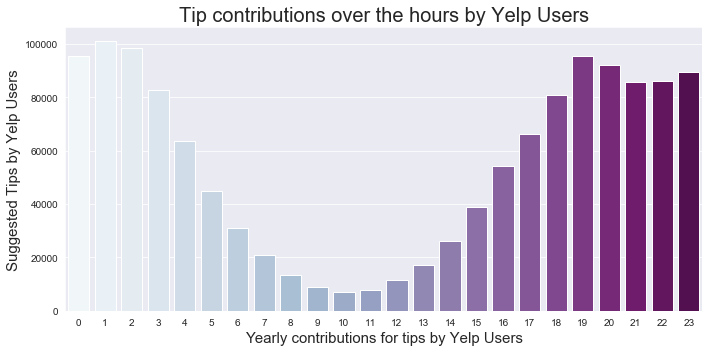

In [54]:
# Let's see how the tipping has changed over the hour
plt.figure(figsize = (10,5))
sns.countplot(tips['Tips - Hour'], palette = 'BuPu' )
plt.xlabel('Yearly contributions for tips by Yelp Users', fontsize = 15)
plt.ylabel('Suggested Tips by Yelp Users', fontsize = 15)
plt.title('Tip contributions over the hours by Yelp Users', fontsize = 20)
plt.tight_layout()
plt.show()

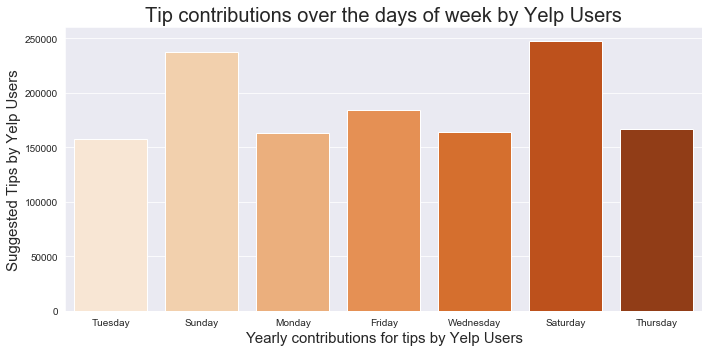

In [55]:
# Let's see how the tipping has changed over the day of week
plt.figure(figsize = (10,5))
sns.countplot(tips['Tips - DayofWeek'], palette = 'Oranges' )
plt.xlabel('Yearly contributions for tips by Yelp Users', fontsize = 15)
plt.ylabel('Suggested Tips by Yelp Users', fontsize = 15)
plt.title('Tip contributions over the days of week by Yelp Users', fontsize = 20)
plt.tight_layout()
plt.show()

**Let's analyze some of the text details**

To do this, we're going to do some preprocessing with our text. 


- First, we will remove the following:
    - Punctuation
    - Digits
    - Lowercase the words
    - Remove stopwords
    
    
    
- Second, we're going to take a look at the number of words and count them along with visually showing the distribution to the word count to get an idea of how long individuals would usually contribute towards suggesting a tip.
- Third, we're going to look at a wordcloud of what some of the words might look like within these tips.
    

In [86]:
# Removing punctuation, numbers and lowercasing for our text column in the dataframe
# Removing all punctuation from our text column
tips['text'] = tips['text'].str.translate(str.maketrans('','', string.punctuation))
print(f'The following punctuations: {string.punctuation} have been removed from the text column')

# Removing all digits/numbers from our text column
tips['text'] = tips['text'].str.translate(str.maketrans('','', string.digits))
print(f'The following {string.digits} have been removed from the text column')

# Lowering all case for our texts
tips['text'] = tips['text'].str.lower()
print(f'The text has been made to lowercase')

# Let's take a look at the columns
tips.head()

The following punctuations: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ have been removed from the text column
The following 0123456789 have been removed from the text column
The text has been made to lowercase


,user_id,business_id,text,date,compliment_count,Tips - Year,Tips - Month,Tips - Day,Tips - Hour,Tips - DayofWeek,Tips Word Count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,here for a quick mtg,2013-11-26 18:20:08,0,2013,November,26,18,Tuesday,28279982
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,cucumber strawberry refresher,2014-06-15 22:26:45,0,2014,June,15,22,Sunday,28279982
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,very nice good service good food,2016-07-18 22:03:42,0,2016,July,18,22,Monday,28279982
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,its a small place the staff is friendly,2014-06-06 01:10:34,0,2014,June,6,1,Friday,28279982
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,sandwiches totalwhat a bargain and the sandw...,2011-04-08 18:12:01,0,2011,April,8,18,Friday,28279982


Because we want it to be more natural in terms of how many words there are within suggestions, we're going to keep the stopwords for now

In [89]:
tips.head()

,user_id,business_id,text,date,compliment_count,Tips - Year,Tips - Month,Tips - Day,Tips - Hour,Tips - DayofWeek
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,here for a quick mtg,2013-11-26 18:20:08,0,2013,November,26,18,Tuesday
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,cucumber strawberry refresher,2014-06-15 22:26:45,0,2014,June,15,22,Sunday
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,very nice good service good food,2016-07-18 22:03:42,0,2016,July,18,22,Monday
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,its a small place the staff is friendly,2014-06-06 01:10:34,0,2014,June,6,1,Friday
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,sandwiches totalwhat a bargain and the sandw...,2011-04-08 18:12:01,0,2011,April,8,18,Friday


In [98]:
# Converting our text column from series to string so that we can split
tips['text'] = tips['text'].astype(str)

# Getting the total number of words in our text columns for the tips by users
tips['Tips Word Count'] = tips['text'].apply(lambda x: len(x.split(' ')))
tips.head()

,user_id,business_id,text,date,compliment_count,Tips - Year,Tips - Month,Tips - Day,Tips - Hour,Tips - DayofWeek,Tips Word Count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,here for a quick mtg,2013-11-26 18:20:08,0,2013,November,26,18,Tuesday,5
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,cucumber strawberry refresher,2014-06-15 22:26:45,0,2014,June,15,22,Sunday,3
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,very nice good service good food,2016-07-18 22:03:42,0,2016,July,18,22,Monday,6
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,its a small place the staff is friendly,2014-06-06 01:10:34,0,2014,June,6,1,Friday,8
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,sandwiches totalwhat a bargain and the sandw...,2011-04-08 18:12:01,0,2011,April,8,18,Friday,11


In [106]:
print(f"Maximum Word Length of suggested tip {tips['Tips Word Count'].max()}")
print(f"Minimum Word Length of suggested tip {tips['Tips Word Count'].min()}")
print(f"Average Word Length of suggested tip {tips['Tips Word Count'].mean()}")

Maximum Word Length of suggested tip 177
Minimum Word Length of suggested tip 1
Average Word Length of suggested tip 11.51329650103236


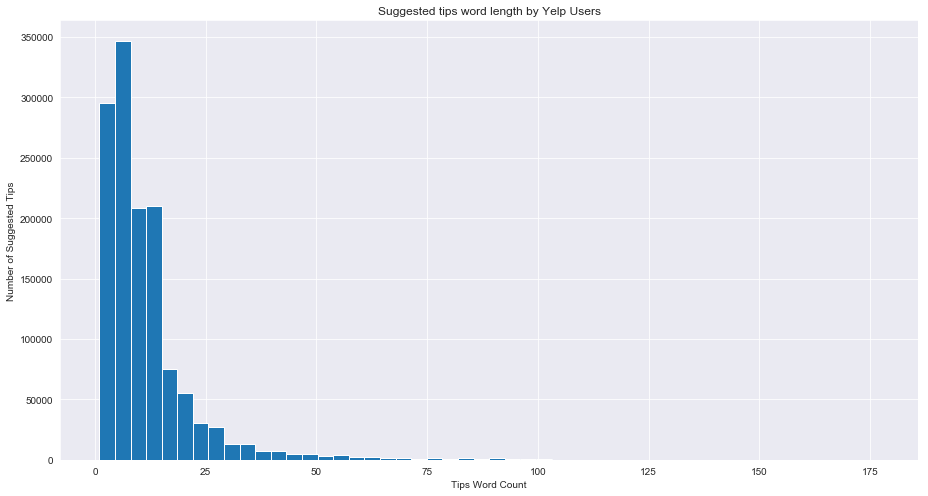

In [118]:
# Plotting the word lengths of tips suggestions.
plt.figure(figsize = (13,7))
plt.hist(tips['Tips Word Count'], bins = 50)
plt.title('Suggested tips word length by Yelp Users')
plt.xlabel('Tips Word Count')
plt.ylabel('Number of Suggested Tips')
plt.tight_layout()
plt.show()



In [124]:
# Initiating the stopwords from wordcloud
stopwords = set(STOPWORDS)

# Creating a list of words 
listofwords = ''

for word in tips['text']:
    
    # Iterate over text and split it
    word = word.split()
    
    for i in range(len(word)):
        
        word[i] = word[i].lower()
        listofwords += " ".join(word) + " "

# Initializing a wordcloud to see words in the text column
text_wordcloud = WordCloud(width = 500,
                          height = 500, 
                          background_color = 'white',
                           stopwords = stopwords).generate(listofwords)


# Now let's visuallly see this graph
plt.figure(figsize = (10,10))
plt.imshow(text_wordcloud)
plt.title('Words in the Text column')
plt.axis('off')
plt.show()

KeyboardInterrupt: 

**Let's take a look at analyzing the text now to understand stuff**

In [ ]:
%%time 
# Setting up our variables
X_true = true_df['text']
X_fake = fake_df['text']

# Instantiating the true and fake vectorizers
true_vectorizer = CountVectorizer(stop_words = 'english')
fake_vectorizer = CountVectorizer(stop_words = 'english')

# Fitting the Vectorizer for the two
true_vectorizer.fit(X_true)
fake_vectorizer.fit(X_fake)

# Transforming X_true and X_fake
X_true = true_vectorizer.transform(X_true)
X_fake = fake_vectorizer.transform(X_fake)

print('Time taken to vectorize:')